# ***1- Import Libraries***

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import os
from warnings import filterwarnings
filterwarnings('ignore')


The Iris dataset consists of 150 samples of iris flowers, each characterized by four features:

    Sepal Length (cm)
    Sepal Width (cm)
    Petal Length (cm)
    Petal Width (cm)

The samples belong to three species:

    Iris-setosa
    Iris-versicolor
    Iris-virginica


# ***2-Read data_set***

In [62]:
data = pd.read_csv('/kaggle/input/lris-data/Iris.csv')

# ***3- information of The dataset¶***

In [63]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [65]:
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


# ***4- preprocessing of the data***

 ***Data Loading and Preprocessing:***

    Load the dataset using Pandas.
    Inspect the data for missing values and basic statistics.
    Convert categorical labels into numeric codes.



In [66]:
data['Species'] = data['Species'].astype('category').cat.codes

# ***5- Visualizing data***

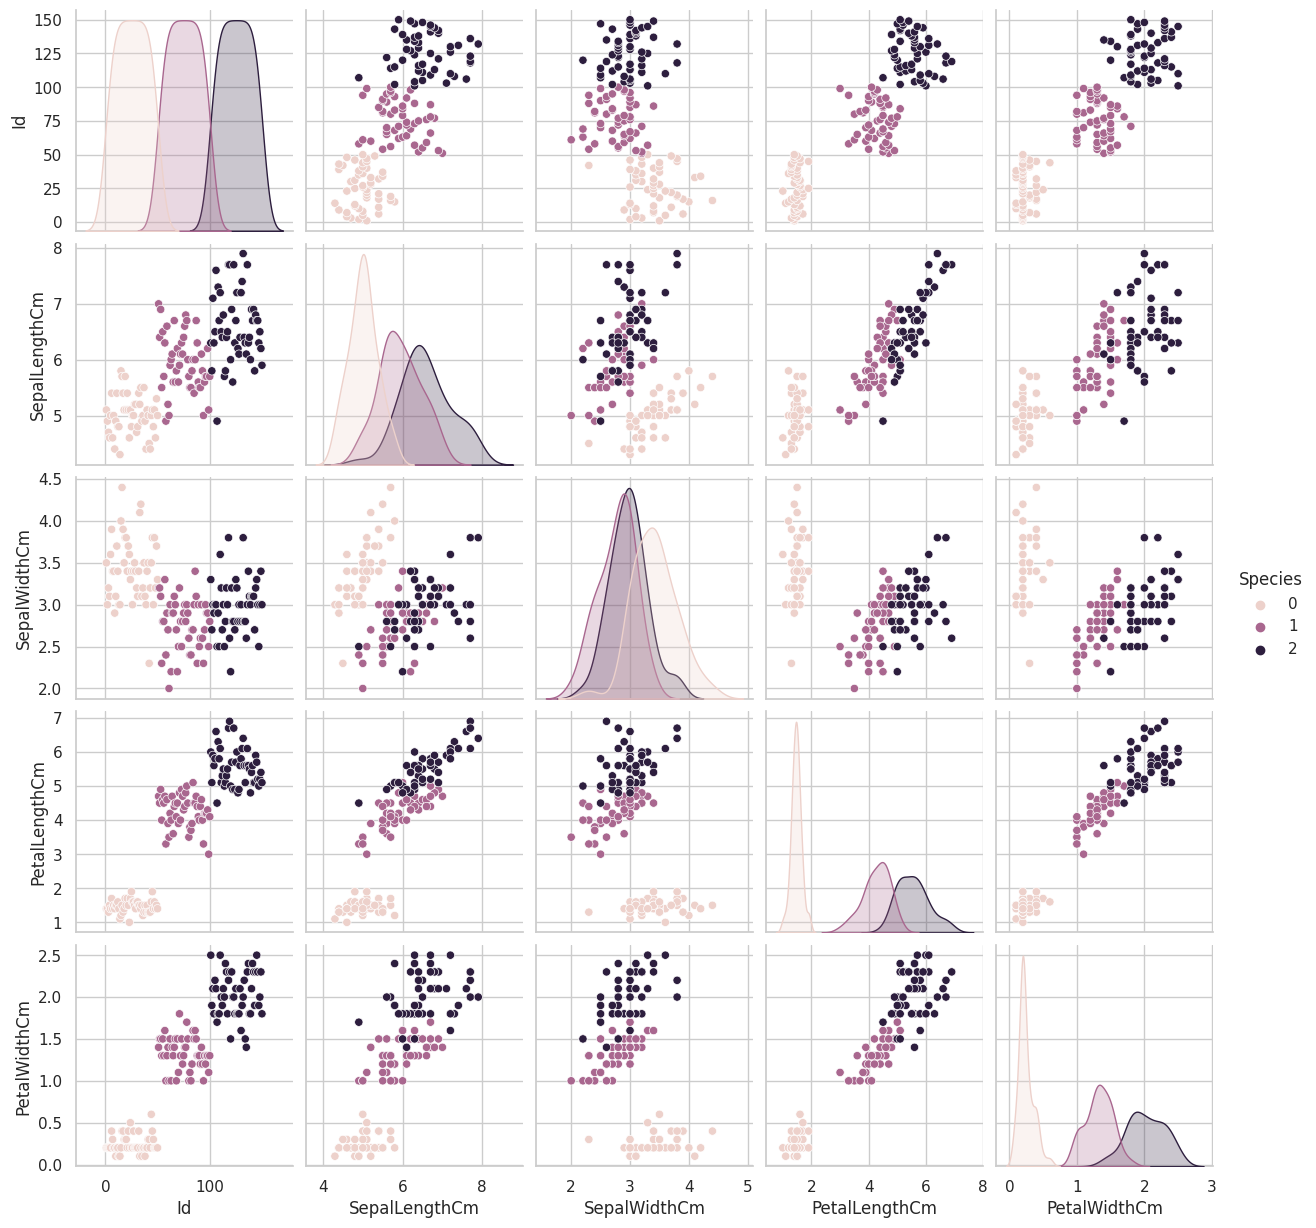

In [67]:
sns.pairplot(data, hue='Species')
plt.show()

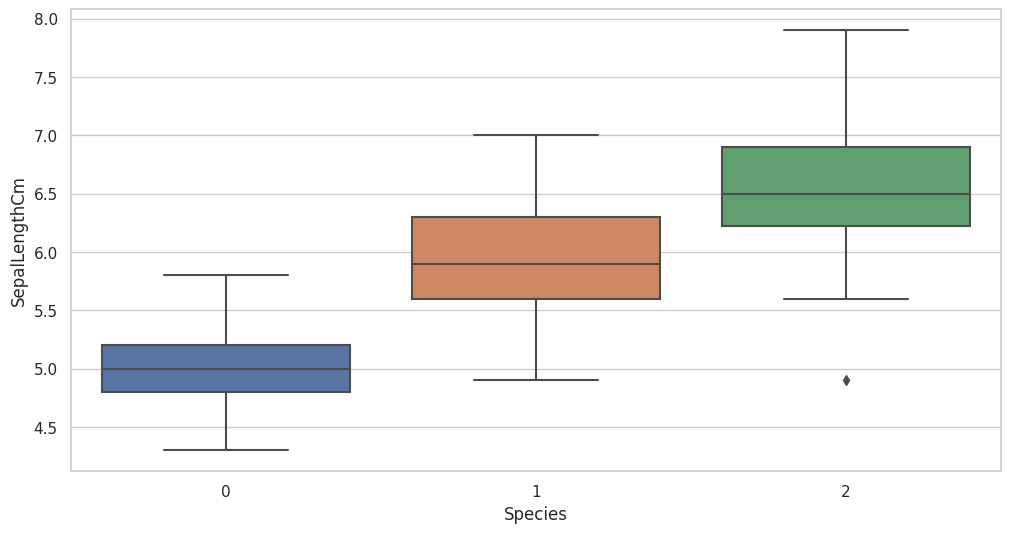

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Species', y='SepalLengthCm')
plt.show()

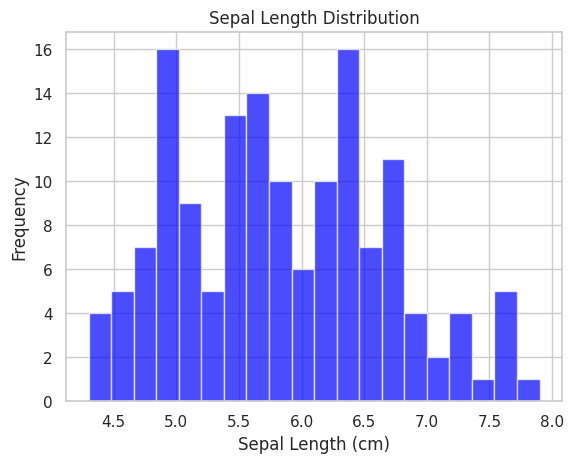

In [69]:
plt.hist(data['SepalLengthCm'], bins=20, color='blue', alpha=0.7)
plt.title('Sepal Length Distribution')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

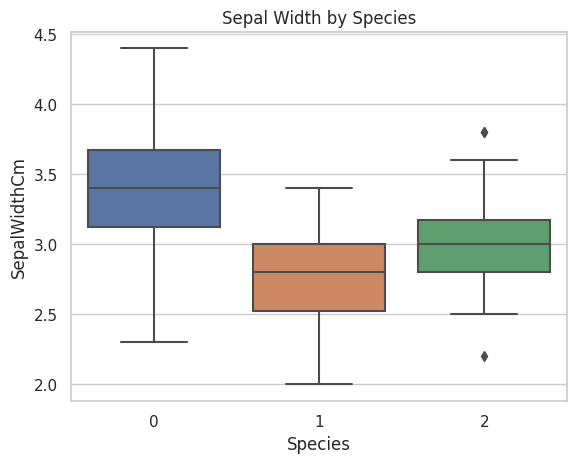

In [70]:
sns.boxplot(x='Species', y='SepalWidthCm', data=data)
plt.title('Sepal Width by Species')
plt.show()

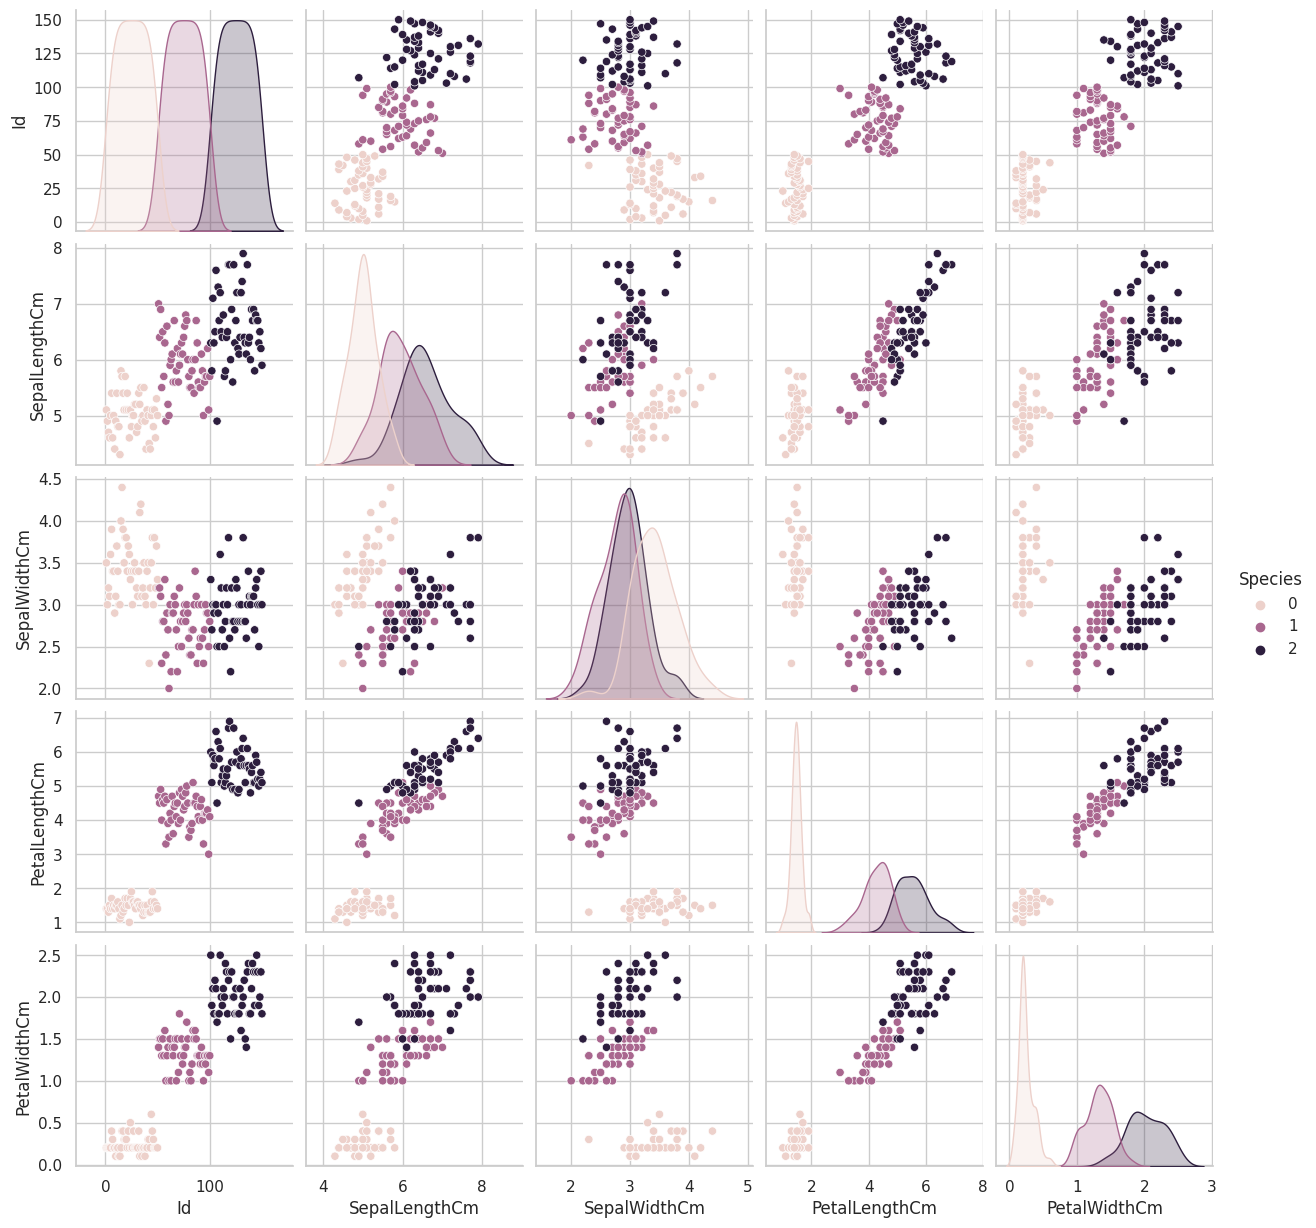

In [71]:
sns.pairplot(data, hue='Species')
plt.show()

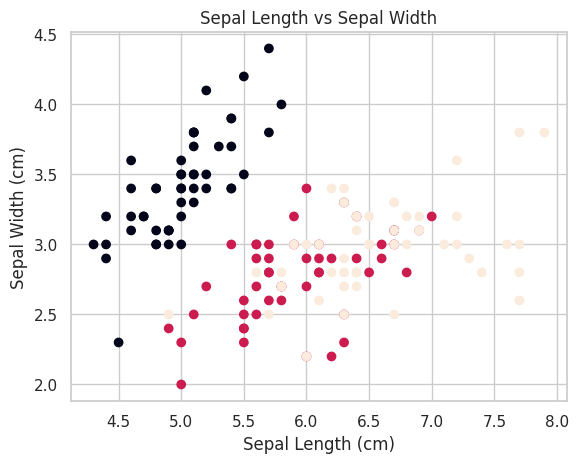

In [72]:
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=data['Species'])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

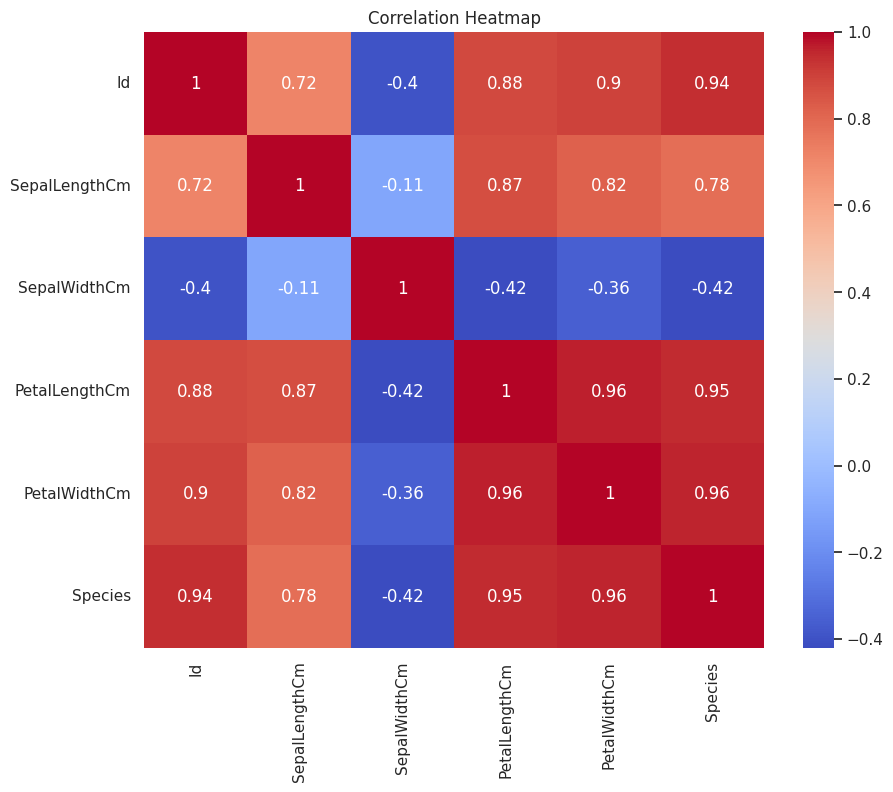

In [73]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

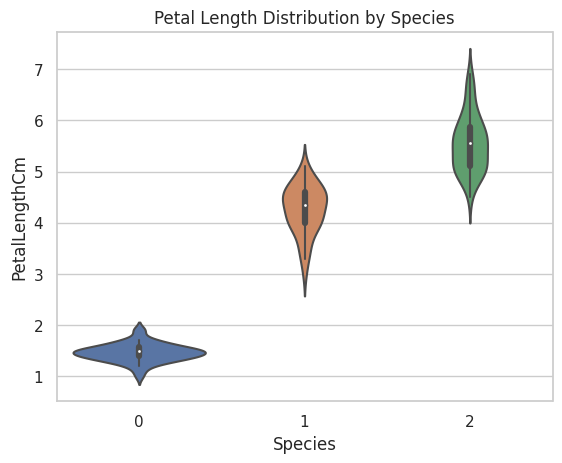

In [74]:
sns.violinplot(x='Species', y='PetalLengthCm', data=data)
plt.title('Petal Length Distribution by Species')
plt.show()

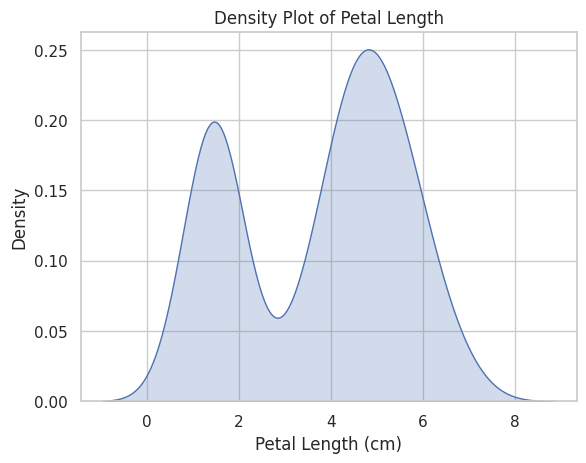

In [75]:
sns.kdeplot(data['PetalLengthCm'], shade=True)
plt.title('Density Plot of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.show()

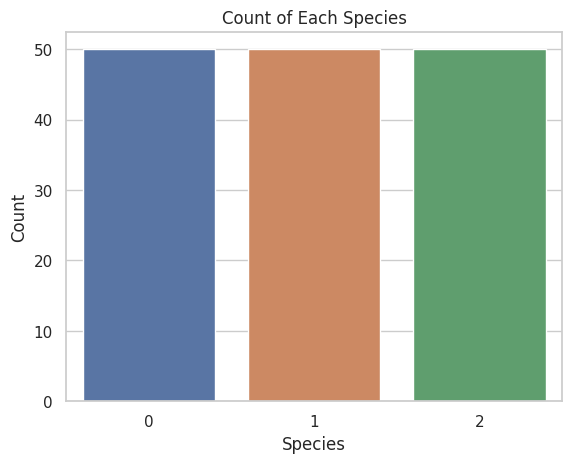

In [76]:
species_counts = data['Species'].value_counts()
sns.barplot(x=species_counts.index, y=species_counts.values)
plt.title('Count of Each Species')
plt.ylabel('Count')
plt.show()

In [77]:
fig = px.scatter_3d(data, x='SepalLengthCm', y='SepalWidthCm', z='PetalLengthCm', color='Species')
fig.show()

In [78]:
fig = px.sunburst(data, path=['Species'], values='SepalLengthCm', title='Sepal Length Distribution by Species')
fig.show()

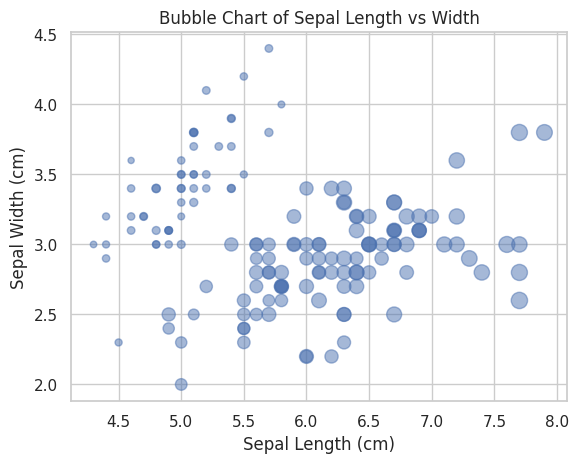

In [79]:
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], s=data['PetalLengthCm'] * 20, alpha=0.5)
plt.title('Bubble Chart of Sepal Length vs Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

In [80]:
fig = px.imshow(data.corr(), text_auto=True, aspect="auto")
fig.update_layout(title='Correlation Heatmap')
fig.show()

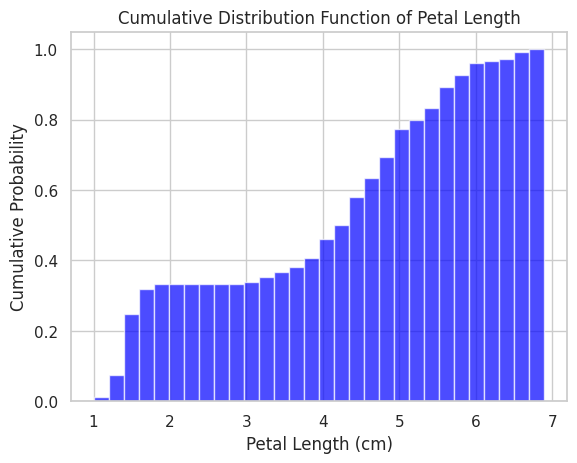

In [81]:
data['PetalLengthCm'].hist(cumulative=True, density=True, bins=30, color='blue', alpha=0.7)
plt.title('Cumulative Distribution Function of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Cumulative Probability')
plt.show()

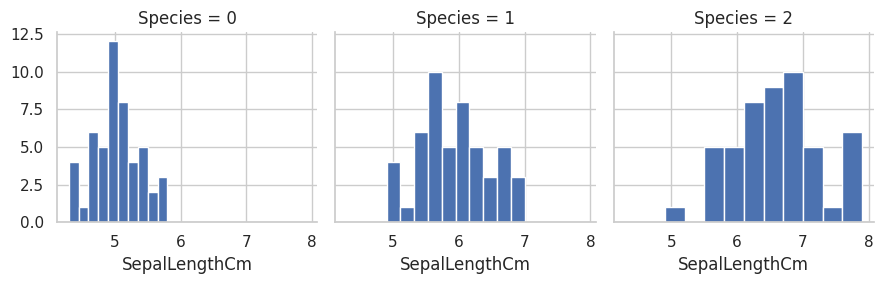

In [82]:
g = sns.FacetGrid(data, col='Species')
g.map(plt.hist, 'SepalLengthCm')
plt.show()

In [83]:
time_data = pd.DataFrame({'Time': pd.date_range(start='1/1/2020', periods=len(data), freq='D'), 'Value': data['SepalLengthCm']})
fig = px.line(time_data, x='Time', y='Value', title='Time Series of Sepal Length')
fig.show()

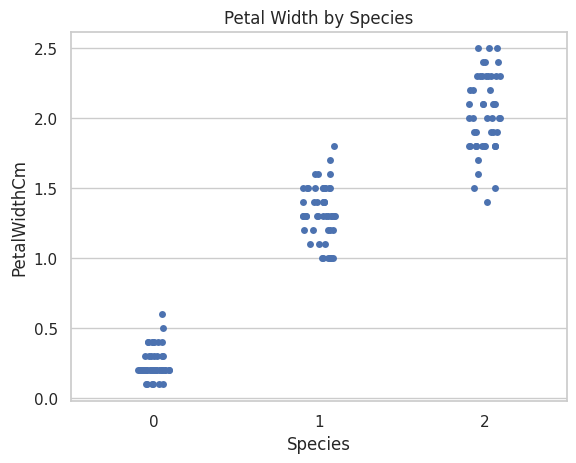

In [84]:
sns.stripplot(x='Species', y='PetalWidthCm', data=data, jitter=True)
plt.title('Petal Width by Species')
plt.show()

# ***6-spliting data***

In [85]:
X = data.drop(['Id', 'Species'], axis=1)
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ***7-modeling***

In [86]:
def optimize_and_train_models(X, y):
    """Optimize and train a variety of boosting models using cross-validation."""
    models = {
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        'LightGBM': LGBMClassifier(),
        'CatBoost': CatBoostClassifier(silent=True)
    }
    
    best_models = {}
    
    for name, model in models.items():
        # Set up hyperparameter tuning
        if name == 'AdaBoost':
            param_grid = {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.5, 1.0]
            }
        elif name == 'Gradient Boosting':
            param_grid = {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.5, 1.0],
                'max_depth': [3, 5, 7]
            }
        elif name == 'XGBoost':
            param_grid = {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.5, 1.0],
                'max_depth': [3, 5, 7]
            }
        else:
            # Skip models that don't have the learning_rate parameter
            continue
        
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_models[name] = grid_search.best_estimator_
        cv_score = cross_val_score(best_models[name], X_train, y_train, cv=5)
        
        print(f'{name} Best Parameters: {grid_search.best_params_}')
        print(f'{name} Cross-Validation Score: {np.mean(cv_score):.4f}')
        
        # Evaluate on test data
        y_pred = best_models[name].predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name} Test Accuracy: {accuracy:.4f}')
        
    return best_models

In [87]:
# Train and optimize models
optimized_models = optimize_and_train_models(X, y)


Gradient Boosting Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Gradient Boosting Cross-Validation Score: 0.9500
Gradient Boosting Test Accuracy: 1.0000
AdaBoost Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
AdaBoost Cross-Validation Score: 0.9417
AdaBoost Test Accuracy: 1.0000
XGBoost Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
XGBoost Cross-Validation Score: 0.9583
XGBoost Test Accuracy: 1.0000


In [88]:
best_model_name = None
best_accuracy = 0

for name, model in optimized_models.items():
    # Evaluate on test data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'{name} Test Accuracy: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

print(f'Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}')

Gradient Boosting Test Accuracy: 1.0000
AdaBoost Test Accuracy: 1.0000
XGBoost Test Accuracy: 1.0000
Best Model: Gradient Boosting with Accuracy: 1.0000


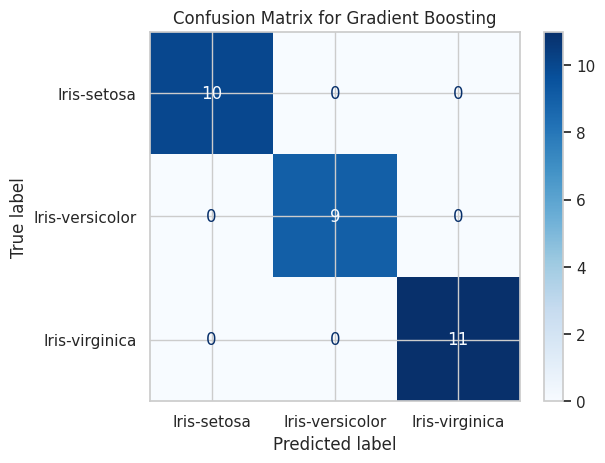

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get the best model
best_model = optimized_models[best_model_name]

# Predict with the best model
y_pred_best = best_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

# ***Results***

    Displayed model accuracies for each algorithm.
    Presented the confusion matrix for the best model, showcasing its performance on the test set.


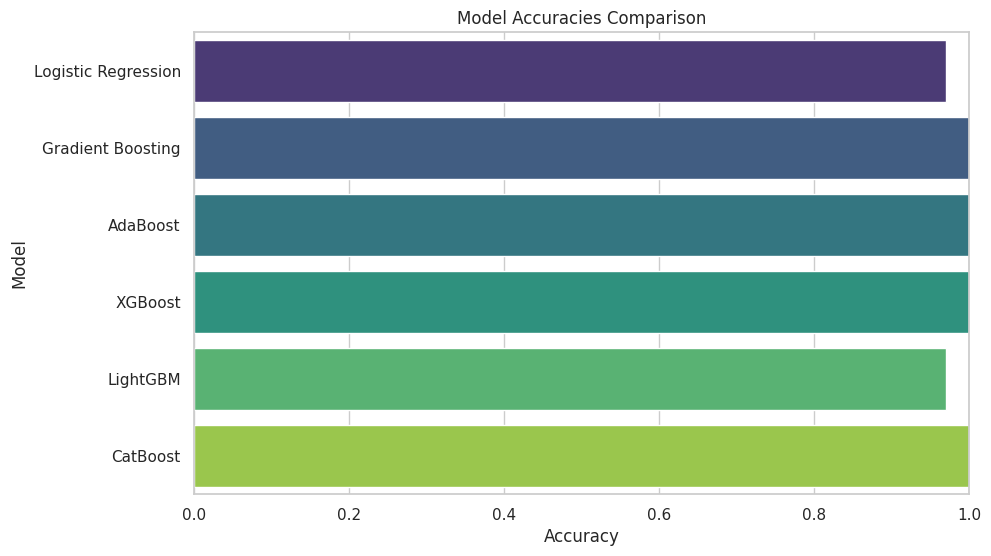

In [90]:
model_names = ['Logistic Regression', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'LightGBM', 'CatBoost']
accuracies = [0.97, 1.00, 1.00, 1.00, 0.97, 1.00]  # Replace with your actual results

# Create a DataFrame for easier plotting
accuracy_data = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Set the style
sns.set(style='whitegrid')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_data, palette='viridis')
plt.title('Model Accuracies Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.show()

# ***Conclusion***

**This notebook demonstrates the effectiveness of various machine learning algorithms on the Iris dataset. The results highlight the strengths of ensemble methods like Gradient Boosting and XGBoost in achieving high accuracy in classification tasks.**
# ***Thank you***